# Big Data Management Workshop II
## Team A - Analysis of current cenergy consumption and production as well as future predictions


## 1. Questions
### 1.1 Descriptive questions:
#### 1.1.1 Electricity production:
- Done: What are the current top 5 producing countries (total) of biofuel / coal / gas / hydro/ nuclear /oil / solar / wind?
- Done Which countries produce the most energy (total) currently?

#### 1.1.2 Electricity  consumption:
- Done: What are the top 5 consuming countries (total) of biofuel / coal / gas / hydro/ nuclear /oil / solar / wind currently?
- Done: Which countries consume the most energy (total / per capita) now?

#### 1.1.3 Development of energy consumption and production:
- What is the overall development of energy production within the last 30 years? 
- What is the overall development of energy consumption within the last 30 years? 
- How is the total and per capita production / consumption distributed across different continents?
- Which country made the largest effort to reduce their fossil footprint in the last 10 years? 
- Who is earth’s biggest winner / looser of the 21st century?

### 1.2 Explorative questions:
Which country will reach total statistical renewable energy consumption first based on our data?
When will Germany reach total statistical renewable energy consumption?
When will Germany reach total statistical renewable energy production?



### 2. Preparation
#### 2.1 Import libraries

In [266]:
import pandas as pd
import numpy as np

#### 2.2 Import the dataset World Energy Consumption
To work with the data we import it from the csv file into a pandas dataframe object

In [267]:
df = pd.read_csv("WorldEnergyConsumption.csv",sep=",")

#### 2.3 Exploration of data
To work with the data, we take a look at the columns and general shape of the data.

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17432 entries, 0 to 17431
Columns: 122 entries, iso_code to wind_energy_per_capita
dtypes: float64(119), int64(1), object(2)
memory usage: 16.2+ MB


In [269]:
df.describe()

,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,energy_cons_change_twh,biofuel_share_elec,biofuel_elec_per_capita,biofuel_cons_change_pct,biofuel_share_energy,biofuel_cons_change_twh,biofuel_consumption,biofuel_cons_per_capita,carbon_intensity_elec,coal_share_elec,coal_cons_change_pct,coal_share_energy,coal_cons_change_twh,coal_consumption,coal_elec_per_capita,coal_cons_per_capita,coal_production,coal_prod_per_capita,electricity_generation,biofuel_electricity,coal_electricity,fossil_electricity,gas_electricity,hydro_electricity,nuclear_electricity,oil_electricity,other_renewable_electricity,other_renewable_exc_biofuel_electricity,renewables_electricity,solar_electricity,wind_electricity,energy_per_gdp,energy_per_capita,fossil_cons_change_pct,fossil_share_energy,fossil_cons_change_twh,fossil_fuel_consumption,fossil_energy_per_capita,fossil_cons_per_capita,fossil_share_elec,gas_share_elec,gas_cons_change_pct,gas_share_energy,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_energy_per_capita,gas_production,gas_prod_per_capita,hydro_share_elec,hydro_cons_change_pct,hydro_share_energy,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_energy_per_capita,low_carbon_share_elec,low_carbon_electricity,low_carbon_elec_per_capita,low_carbon_cons_change_pct,low_carbon_share_energy,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_energy_per_capita,nuclear_share_elec,nuclear_cons_change_pct,nuclear_share_energy,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_energy_per_capita,oil_share_elec,oil_cons_change_pct,oil_share_energy,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_energy_per_capita,oil_production,oil_prod_per_capita,other_renewables_elec_per_capita,other_renewables_share_elec,other_renewables_cons_change_pct,other_renewables_share_energy,other_renewables_cons_change_twh,other_renewable_consumption,other_renewables_energy_per_capita,per_capita_electricity,population,primary_energy_consumption,renewables_elec_per_capita,renewables_share_elec,renewables_cons_change_pct,renewables_share_energy,renewables_cons_change_twh,renewables_consumption,renewables_energy_per_capita,solar_share_elec,solar_cons_change_pct,solar_share_energy,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
count,17432.000000,7445.000000,10394.000000,4.862000e+03,7893.000000,6521.000000,8565.000000,9842.00000,9892.000000,4206.000000,4189.000000,519.000000,4284.000000,5509.000000,5626.000000,5626.000000,588.000000,5056.000000,3762.00000,4284.000000,4207.000000,5170.000000,4759.000000,4290.000000,10629.000000,9653.000000,6119.000000,4249.000000,5099.000000,5099.000000,5099.000000,6119.000000,6119.000000,5099.000000,6084.000000,4249.000000,6084.000000,6119.000000,6119.000000,6900.000000,9.035000e+03,4201.000000,4284.000000,4201.000000,4284.000000,4284.000000,4759.000000,5056.000000,5056.000000,3704.000000,4284.000000,4207.000000,5170.000000,4759.000000,4290.000000,8066.000000,7340.000000,6076.000000,3664.000000,4284.000000,4207.000000,4290.000000,5499.000000,4290.000000,6041.000000,6084.000000,5499.000000,3835.000000,4284.000000,4207.000000,4290.000000,4290.000000,6076.000000,1522.000000,4284.000000,4207.000000,4290.000000,5499.000000,4290.000000,5056.000000,4201.000000,4284.00000,4201.000000,5184.000000,4759.000000,4284.000000,8710.000000,7.924000e+03,5499.000000,6041.000000,2326.000000,4284.000000,4207.000000,4290.000000,4290.000000,5499.000000,1.567600e+04,10134.000000,5499.000000,6041.000000,3828.000000,4284.000000,4207.000000,4290.000000,4290.000000,6076.000000,1325.000000,4284.000000,4207.000000,4290.000000,5499.000000,4290.000000,1.045600e+04,6076.000000,1543.000000,4284.000000,4207.000000,4290.000000,5499.00

In [270]:
df.shape

(17432, 122)

In [271]:
df_column_list = list(df.columns)
print('Header names of the data set columns:' )
for val in df_column_list:
    print('- ' + val + '/n')


Header names of the data set columns:
- iso_code/n
- country/n
- year/n
- coal_prod_change_pct/n
- coal_prod_change_twh/n
- gas_prod_change_pct/n
- gas_prod_change_twh/n
- oil_prod_change_pct/n
- oil_prod_change_twh/n
- energy_cons_change_pct/n
- energy_cons_change_twh/n
- biofuel_share_elec/n
- biofuel_elec_per_capita/n
- biofuel_cons_change_pct/n
- biofuel_share_energy/n
- biofuel_cons_change_twh/n
- biofuel_consumption/n
- biofuel_cons_per_capita/n
- carbon_intensity_elec/n
- coal_share_elec/n
- coal_cons_change_pct/n
- coal_share_energy/n
- coal_cons_change_twh/n
- coal_consumption/n
- coal_elec_per_capita/n
- coal_cons_per_capita/n
- coal_production/n
- coal_prod_per_capita/n
- electricity_generation/n
- biofuel_electricity/n
- coal_electricity/n
- fossil_electricity/n
- gas_electricity/n
- hydro_electricity/n
- nuclear_electricity/n
- oil_electricity/n
- other_renewable_electricity/n
- other_renewable_exc_biofuel_electricity/n
- renewables_electricity/n
- solar_electricity/n
- wi

Let's take a quick look at some data entries to get a better understanding of the data.

In [272]:
df.head(10)

,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,energy_cons_change_twh,biofuel_share_elec,biofuel_elec_per_capita,biofuel_cons_change_pct,biofuel_share_energy,biofuel_cons_change_twh,biofuel_consumption,biofuel_cons_per_capita,carbon_intensity_elec,coal_share_elec,coal_cons_change_pct,coal_share_energy,coal_cons_change_twh,coal_consumption,coal_elec_per_capita,coal_cons_per_capita,coal_production,coal_prod_per_capita,electricity_generation,biofuel_electricity,coal_electricity,fossil_electricity,gas_electricity,hydro_electricity,nuclear_electricity,oil_electricity,other_renewable_electricity,other_renewable_exc_biofuel_electricity,renewables_electricity,solar_electricity,wind_electricity,energy_per_gdp,energy_per_capita,fossil_cons_change_pct,fossil_share_energy,fossil_cons_change_twh,fossil_fuel_consumption,fossil_energy_per_capita,fossil_cons_per_capita,fossil_share_elec,gas_share_elec,gas_cons_change_pct,gas_share_energy,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_energy_per_capita,gas_production,gas_prod_per_capita,hydro_share_elec,hydro_cons_change_pct,hydro_share_energy,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_energy_per_capita,low_carbon_share_elec,low_carbon_electricity,low_carbon_elec_per_capita,low_carbon_cons_change_pct,low_carbon_share_energy,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_energy_per_capita,nuclear_share_elec,nuclear_cons_change_pct,nuclear_share_energy,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_energy_per_capita,oil_share_elec,oil_cons_change_pct,oil_share_energy,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_energy_per_capita,oil_production,oil_prod_per_capita,other_renewables_elec_per_capita,other_renewables_share_elec,other_renewables_cons_change_pct,other_renewables_share_energy,other_renewables_cons_change_twh,other_renewable_consumption,other_renewables_energy_per_capita,per_capita_electricity,population,primary_energy_consumption,renewables_elec_per_capita,renewables_share_elec,renewables_cons_change_pct,renewables_share_energy,renewables_cons_change_twh,renewables_consumption,renewables_energy_per_capita,solar_share_elec,solar_cons_change_pct,solar_share_energy,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
0,AFG,Afghanistan,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5021241.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1901,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5053439.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,1902,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,508

### 3. Cleansing and restructuring of the data
To work with the data, we have to remove unusable and not relevant data as well as missing data points.

1. Look for null values and whether they can be reduced or should be kept (more data in the row)
2. Look for empty rows
3. Looking for duplicates

#### 3.1 Looking for null values
Check if there are any null values in the dataset. From the exploration before we know that there have to be at least some.

In [273]:
df.isna().apply(pd.value_counts)

,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,energy_cons_change_twh,biofuel_share_elec,biofuel_elec_per_capita,biofuel_cons_change_pct,biofuel_share_energy,biofuel_cons_change_twh,biofuel_consumption,biofuel_cons_per_capita,carbon_intensity_elec,coal_share_elec,coal_cons_change_pct,coal_share_energy,coal_cons_change_twh,coal_consumption,coal_elec_per_capita,coal_cons_per_capita,coal_production,coal_prod_per_capita,electricity_generation,biofuel_electricity,coal_electricity,fossil_electricity,gas_electricity,hydro_electricity,nuclear_electricity,oil_electricity,other_renewable_electricity,other_renewable_exc_biofuel_electricity,renewables_electricity,solar_electricity,wind_electricity,energy_per_gdp,energy_per_capita,fossil_cons_change_pct,fossil_share_energy,fossil_cons_change_twh,fossil_fuel_consumption,fossil_energy_per_capita,fossil_cons_per_capita,fossil_share_elec,gas_share_elec,gas_cons_change_pct,gas_share_energy,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_energy_per_capita,gas_production,gas_prod_per_capita,hydro_share_elec,hydro_cons_change_pct,hydro_share_energy,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_energy_per_capita,low_carbon_share_elec,low_carbon_electricity,low_carbon_elec_per_capita,low_carbon_cons_change_pct,low_carbon_share_energy,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_energy_per_capita,nuclear_share_elec,nuclear_cons_change_pct,nuclear_share_energy,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_energy_per_capita,oil_share_elec,oil_cons_change_pct,oil_share_energy,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_energy_per_capita,oil_production,oil_prod_per_capita,other_renewables_elec_per_capita,other_renewables_share_elec,other_renewables_cons_change_pct,other_renewables_share_energy,other_renewables_cons_change_twh,other_renewable_consumption,other_renewables_energy_per_capita,per_capita_electricity,population,primary_energy_consumption,renewables_elec_per_capita,renewables_share_elec,renewables_cons_change_pct,renewables_share_energy,renewables_cons_change_twh,renewables_consumption,renewables_energy_per_capita,solar_share_elec,solar_cons_change_pct,solar_share_energy,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
False,15630,17432.0,17432.0,7445,10394,4862,7893,6521,8565,9842,9892,4206,4189,519,4284,5509,5626,5626,588,5056,3762,4284,4207,5170,4759,4290,10629,9653,6119,4249,5099,5099,5099,6119,6119,5099,6084,4249,6084,6119,6119,6900,9035,4201,4284,4201,4284,4284,4759,5056,5056,3704,4284,4207,5170,4759,4290,8066,7340,6076,3664,4284,4207,4290,5499,4290,6041,6084,5499,3835,4284,4207,4290,4290,6076,1522,4284,4207,4290,5499,4290,5056,4201,4284,4201,5184,4759,4284,8710,7924,5499,6041,2326,4284,4207,4290,4290,5499,15676,10134,5499,6041,3828,4284,4207,4290,4290,6076,1325,4284,4207,4290,5499,4290,10456,6076,1543,4284,4207,4290,5499,4290
True,1802,NaN,NaN,9987,7038,12570,9539,10911,8867,7590,7540,13226,13243,16913,13148,11923,11806,11806,16844,12376,13670,13148,13225,12262,12673,13142,6803,7779,11313,13183,12333,12333,12333,11313,11313,12333,11348,13183,11348,11313,11313,10532,8397,13231,13148,13231,13148,13148,12673,12376,12376,13728,13148,13225,12262,12673,13142,9366,10092,11356,13768,13148,13225,13142,11933,13142,11391,11348,11933,13597,13148,13225,13142,13142,11356,15910,13148,13225,13142,11933,13142,12376,13231,13148,13231,12248,12673,13148,8722,9508,11933,11391,15106,13148,13225,13142,13142,11933,1756,7298,11933,11391,13604,13148,13225,13142,13142,11356,16107,13148,13225,13142,11933,13142,6976,11356,15889,13148,13225,13142,11933,13142


Now we look more closely for the number of null values

In [274]:
df.isnull().sum()

iso_code                   1802
country                       0
year                          0
coal_prod_change_pct       9987
coal_prod_change_twh       7038
                          ...  
wind_share_energy         13148
wind_cons_change_twh      13225
wind_consumption          13142
wind_elec_per_capita      11933
wind_energy_per_capita    13142
Length: 122, dtype: int64

Especially in the renewable energy sector we have a lot of null values since it is a more recent technology and the data stretches back until 1901.

We have to keep this in mind to map the null values properly. Removing them fully would lead to a largely reduced data set with incomplete data.  df = df.dropna() --> results in a reduction from >17000 entries to 14.


#### 3.2 Looking for empty rows
Since we cannot remove single fields we can check for rows that might be completely empty. Those we can delete savely. From earlied we know that country and year are always present so we need to drop those two columns first before can look for empty rows, otherwise we would recieve no results.

In [275]:
temp_df = df.drop(columns=['country', 'year'])
empty_row_indexes = temp_df.index[temp_df.isna().all(axis=1)].tolist()

print (empty_row_indexes)

[]


There are no empty rows that we could drop.

#### 3.3 Looking for duplicated entries
As our next step, we search for duplicate entries.

In [276]:
df.duplicated().sum()

0

0 means that there are no duplicate entries in our data set.

### 4. Logical cleaning of our data
After we looked at the data set from a technical approach to identify the null values, to remove empty rows as well as duplicates we can start to logically clean our data. The maximum data we need is a view back the last 50 years.


In [277]:
target_year_cap = 2019 - 50;
print('Last year: ' + str(target_year_cap))

Last year: 1969


Thus we remove every entry that contains data that is older than 1969.

In [278]:
wdf = df
bigger_than_1950 = wdf['year'] >= target_year_cap
wdf  = wdf[bigger_than_1950]

wdf.shape

(10825, 122)

As a result, we removed around 7000 entries that are not necessary for our analysis.

### 5. Analysis
#### 5.1 What are the current top 5 electricity producing countries (total/per capita) out of biofuel / coal / gas / hydro/ nuclear /oil / solar / wind?
##### 5.1.1 Countries that currently (2019) produce the most electricity in total (independent of type)


In [279]:
df_511 = wdf
target_year_511 = 2019
is_2019 =  df_511['year'] == target_year_511
is_country = np.logical_and(df_511['iso_code'] != 'OWID_WRL', df_511['iso_code'].notnull())
df_511  =  df_511[is_2019]
df_511  = df_511[is_country]
df_511_ref  =  df_511[['iso_code', 'country', 'electricity_generation', 'fossil_electricity', 'nuclear_electricity','renewables_electricity', 'other_renewable_electricity']]
# select the top 5 - total
df_511_electricity_total_5 = df_511_ref.nlargest(5, 'electricity_generation')

<ipython-input-279-270d0d90def3>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_511  = df_511[is_country]


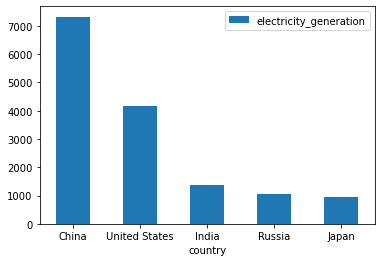

In [280]:
ax = df_511_electricity_total_5.plot.bar(x='country', y='electricity_generation', rot=0)

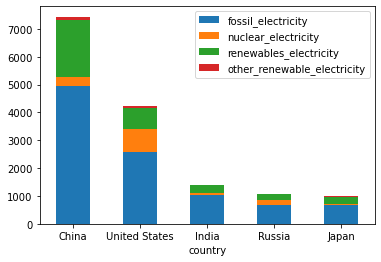

In [281]:
# stack renewable and non renewable
df_511_electricity_fossil_renweable_stacked = df_511_ref.nlargest(5, 'electricity_generation')
df_511_electricity_fossil_renweable_stacked = df_511_electricity_fossil_renweable_stacked.drop(columns=['electricity_generation'])
ax = df_511_electricity_fossil_renweable_stacked.plot.bar(x='country', rot=0, stacked=True)


##### 5.1.2 Countries that currently (2019) produce the most electricity out of biofuel

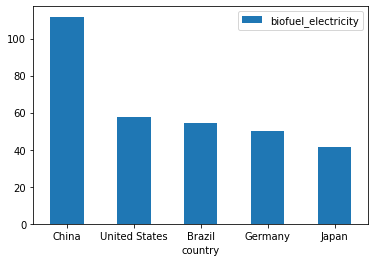

In [282]:
df_512 = wdf
target_year_512 = 2019
is_2019 =  df_512['year'] == target_year_512
is_country = np.logical_and(df_512['iso_code'] != 'OWID_WRL', df_512['iso_code'].notnull())
df_512  =  df_512.loc[is_2019]
df_512  =   df_512.loc[is_country]
df_512_ref  =  df_512[['iso_code', 'country','biofuel_electricity']]
df_512_biofuel_electricity = df_512_ref.nlargest(5, 'biofuel_electricity')
ax = df_512_biofuel_electricity.plot.bar(x='country', rot=0, stacked=True)

##### 5.1.3 Countries that currently (2019) produce the most  electricity out of coal

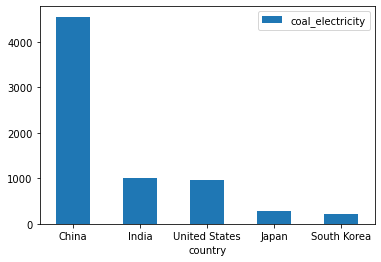

In [283]:
df_513 = wdf
target_year_513 = 2019
is_2019 =  df_513['year'] == target_year_513
is_country = np.logical_and(df_513['iso_code'] != 'OWID_WRL', df_513['iso_code'].notnull())
df_513  =  df_513.loc[is_2019]
df_513  =   df_513.loc[is_country]
df_513_ref  =  df_513[['iso_code', 'country','coal_electricity']]
df_513_coal_electricity = df_513_ref.nlargest(5, 'coal_electricity')
ax = df_513_coal_electricity.plot.bar(x='country', rot=0, stacked=True)

##### 5.1.4 Countries that currently (2019) produce the most electricity out of gas

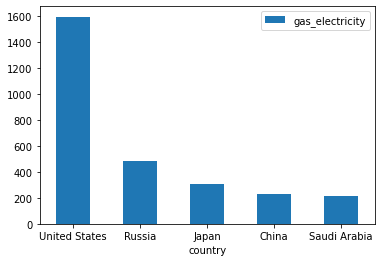

In [284]:
df_514 = wdf
target_year_514 = 2019
is_2019 =  df_514['year'] == target_year_514
is_country = np.logical_and(df_514['iso_code'] != 'OWID_WRL', df_514['iso_code'].notnull())
df_514  =  df_514.loc[is_2019]
df_514  =   df_514.loc[is_country]
df_514_ref  =  df_514[['iso_code', 'country','gas_electricity']]
df_514_gas_electricity = df_514_ref.nlargest(5, 'gas_electricity')
ax = df_514_gas_electricity.plot.bar(x='country', rot=0, stacked=True)

##### 5.1.5 Countries that currently (2019) produce the most electricity out of hydro

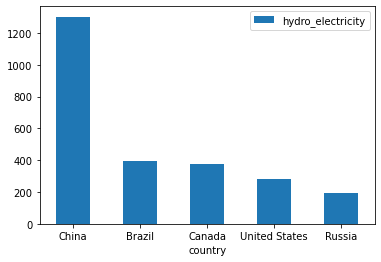

In [285]:
df_515 = wdf
target_year_515 = 2019
is_2019 =  df_515['year'] == target_year_515
is_country = np.logical_and(df_515['iso_code'] != 'OWID_WRL', df_515['iso_code'].notnull())
df_515  =  df_515.loc[is_2019]
df_515  =   df_515.loc[is_country]
df_515_ref  =  df_515[['iso_code', 'country','hydro_electricity']]
df_515_hyrdo_electricity = df_515_ref.nlargest(5, 'hydro_electricity')
ax = df_515_hyrdo_electricity.plot.bar(x='country', rot=0, stacked=True)

##### 5.1.6 Countries that currently (2019) produce the most electricity out of nuclear

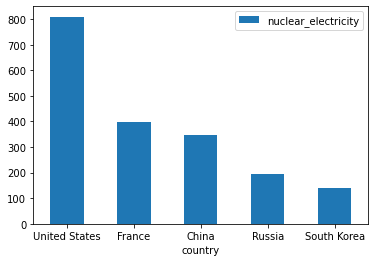

In [286]:
df_516 = wdf
target_year_516 = 2019
is_2019 =  df_516['year'] == target_year_516
is_country = np.logical_and(df_516['iso_code'] != 'OWID_WRL', df_516['iso_code'].notnull())
df_516  =  df_516.loc[is_2019]
df_516  =   df_516.loc[is_country]
df_516_ref  =  df_516[['iso_code', 'country','nuclear_electricity']]
df_516_nuclear_electricity = df_516_ref.nlargest(5, 'nuclear_electricity')
ax = df_516_nuclear_electricity.plot.bar(x='country', rot=0, stacked=True)

##### 5.1.7 Countries that currently (2019) produce the most electricity out of oil

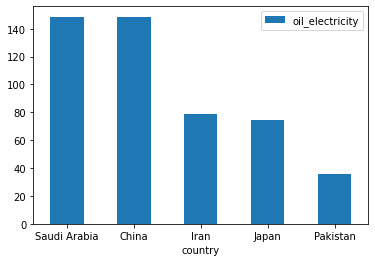

In [287]:
df_517 = wdf
target_year_517 = 2019
is_2019 =  df_517['year'] == target_year_517
is_country = np.logical_and(df_517['iso_code'] != 'OWID_WRL', df_517['iso_code'].notnull())
df_517  =  df_517.loc[is_2019]
df_517  =   df_517.loc[is_country]
df_517_ref  =  df_517[['iso_code', 'country','oil_electricity']]
df_517_oil_electricity = df_517_ref.nlargest(5, 'oil_electricity')
ax = df_517_oil_electricity.plot.bar(x='country', rot=0, stacked=True)

##### 5.1.8 Countries that currently (2019) produce the most electricity out of solar

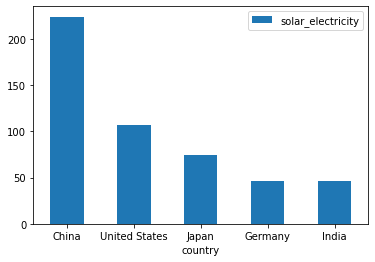

In [288]:
df_518 = wdf
target_year_518 = 2019
is_2019 =  df_518['year'] == target_year_518
is_country = np.logical_and(df_518['iso_code'] != 'OWID_WRL', df_518['iso_code'].notnull())
df_518  =  df_518.loc[is_2019]
df_518  =   df_518.loc[is_country]
df_518_ref  =  df_518[['iso_code', 'country','solar_electricity']]
df_518_solar_electricity = df_518_ref.nlargest(5, 'solar_electricity')
ax = df_518_solar_electricity.plot.bar(x='country', rot=0, stacked=True)

##### 5.1.9 Countries that currently (2019) produce the most electricity out of wind

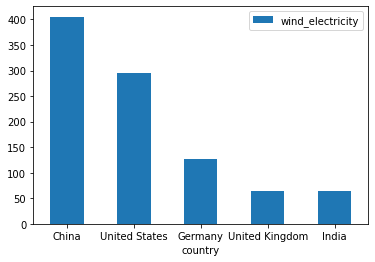

In [289]:
df_519 = wdf
target_year_519 = 2019
is_2019 =  df_519['year'] == target_year_519
is_country = np.logical_and(df_519['iso_code'] != 'OWID_WRL', df_519['iso_code'].notnull())
df_519  =  df_519.loc[is_2019]
df_519  =   df_519.loc[is_country]
df_519_ref  =  df_519[['iso_code', 'country','wind_electricity']]
df_519_wind_electricity = df_519_ref.nlargest(5, 'wind_electricity')
ax = df_519_wind_electricity.plot.bar(x='country', rot=0, stacked=True)

##### 5.2.1 Countries that currently (2019) consume the most electricity (independent of type)


In [290]:
## converts twh to kwh
def convert(kwh):
    return kwh / 1000000000


def aggregate(pop, per_cap):
    result = [None] * per_cap.size
    for x in range(len(result)):
        result[x] = pop[x] * per_cap[x]
    return list(map(convert, result))

<ipython-input-291-7fd029432393>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_521  = df_521[is_country]


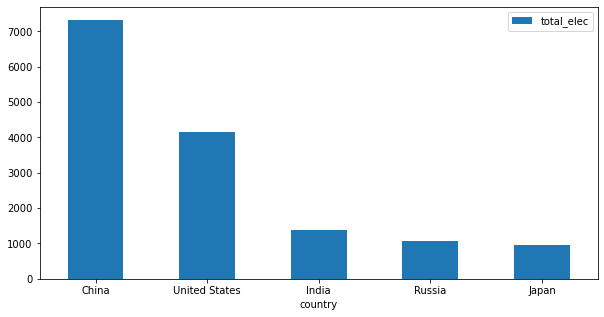

In [291]:
df_521 = wdf
target_year_521 = 2019
is_2019 =  df_521['year'] == target_year_521
is_country = np.logical_and(df_521['iso_code'] != 'OWID_WRL', df_521['iso_code'].notnull())
df_521  =  df_521[is_2019]
df_521  = df_521[is_country]
# arrays per capita x  population
country = df_521['country'].to_numpy()
population = df_521['population'].to_numpy()
per_cap_elec = df_521['per_capita_electricity'].to_numpy()
per_cap_bio = df_521['biofuel_elec_per_capita'].to_numpy()
per_cap_coal = df_521['coal_elec_per_capita'].to_numpy()
per_cap_gas = df_521['gas_elec_per_capita'].to_numpy()
per_cap_hydro = df_521['hydro_elec_per_capita'].to_numpy()
per_cap_nuc = df_521['nuclear_elec_per_capita'].to_numpy()
per_cap_oil = df_521['oil_elec_per_capita'].to_numpy()
per_cap_sol = df_521['solar_elec_per_capita'].to_numpy()
per_cap_wind = df_521['wind_elec_per_capita'].to_numpy()
per_cap_other = df_521['other_renewables_elec_per_capita'].to_numpy()

## TOTAL
# create array for total electricity consumption
total_elec = aggregate(population, per_cap_elec)

## BIOFUEL
## create array for total biofuel elec consumption
total_elec_bio = aggregate(population, per_cap_bio)

## COAL
## create array for total coal elec consumption
total_elec_coal = aggregate(population, per_cap_coal)

## GAS
## create array for total gas elec consumption
total_elec_gas = aggregate(population, per_cap_gas)

## HYDRO
## create array for total gas elec consumption
total_elec_hydro = aggregate(population, per_cap_hydro)

## NUCLEAR
## create array for total gas elec consumption
total_elec_nuc = aggregate(population, per_cap_nuc)

## OIL
## create array for total gas elec consumption
total_elec_oil = aggregate(population, per_cap_oil)

## SOLAR
## create array for total gas elec consumption
total_elec_sol = aggregate(population, per_cap_sol)

## WIND
## create array for total gas elec consumption
total_elec_wind = aggregate(population, per_cap_wind)

## OTHER
## create array for total gas elec consumption
total_elec_other = aggregate(population, per_cap_other)
# remove duplicates from other and biofuel

dict = {
        'country': country, 'pop': population, 
        'total_elec': total_elec, 
        'total_elec_bio': total_elec_bio,
        'total_elec_coal': total_elec_coal,
        'total_elec_gas': total_elec_gas,
        'total_elec_hydro': total_elec_hydro,
        'total_elec_nuc': total_elec_nuc,
        'total_elec_oil': total_elec_oil,
        'total_elec_sol': total_elec_sol,
        'total_elec_wind': total_elec_wind,
}
pd.set_option('display.max_columns', None)
df_521_ref = pd.DataFrame(dict)

# add new data set columns
df_521_total_elec = df_521_ref.nlargest(5, 'total_elec')

ax = df_521_total_elec.plot.bar(x='country', y='total_elec', rot=0, figsize=(10,5))

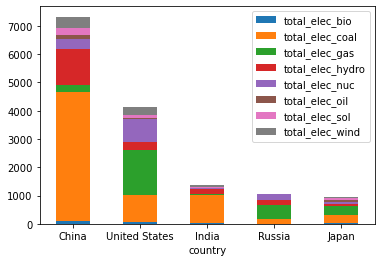

In [292]:
# stack renewable and non renewable
df_521_total_elec_per_cap_5_stacked = df_521_ref.nlargest(5, 'total_elec')
df_521_total_elec_per_cap_5_stacked = df_521_total_elec_per_cap_5_stacked.drop(columns=['pop', 'total_elec'])
ax = df_521_total_elec_per_cap_5_stacked.plot.bar(x='country', rot=0, stacked=True)



##### 5.2.2 Countries that currently (2019) consume the most electricity out of biofuel

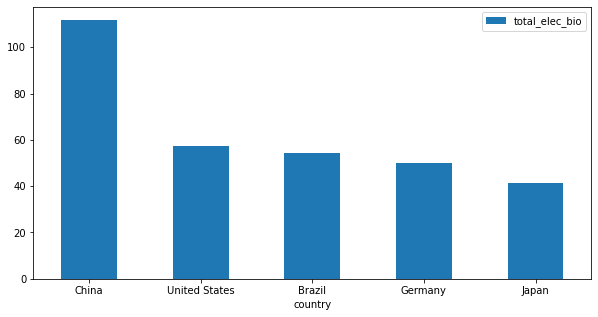

In [293]:
df_522 = df_521_ref
df_522_ref  =  df_522[['country', 'total_elec_bio']]
# select the top 5 - biofuel
df_522_biofuel_5 = df_522_ref.nlargest(5, 'total_elec_bio')
ax = df_522_biofuel_5.plot.bar(x='country', y='total_elec_bio', rot=0, figsize=(10,5))

##### 5.2.3 Countries that currently (2019) consume the most electricity out of coal

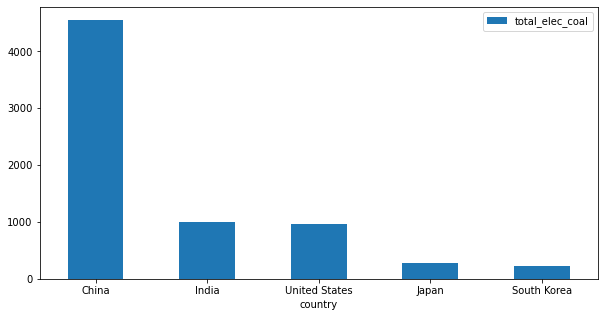

In [294]:
df_523 = df_521_ref
df_523_ref  =  df_523[['country', 'total_elec_coal']]
# select the top 5 - coal
df_523_coal_5 = df_523_ref.nlargest(5, 'total_elec_coal')
ax = df_523_coal_5.plot.bar(x='country', y='total_elec_coal', rot=0, figsize=(10,5))

##### 5.2.4 Countries that currently (2019) consume the most electricity per capita out of gas

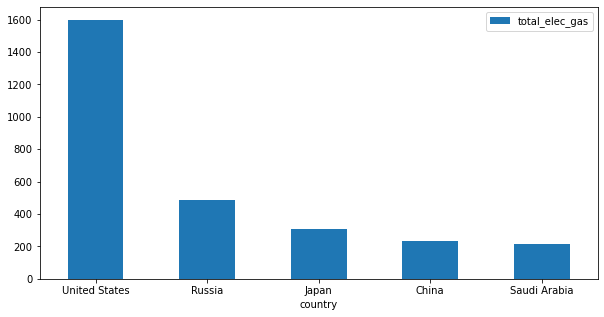

In [295]:
df_524 = df_521_ref
df_524_ref  =  df_524[['country', 'total_elec_gas']]
# select the top 5 - coal
df_524_gas_5 = df_524_ref.nlargest(5, 'total_elec_gas')
ax = df_524_gas_5.plot.bar(x='country', y='total_elec_gas', rot=0, figsize=(10,5))

##### 5.2.5 Countries that currently (2019) consume the most electricity per capita out of hyrdo

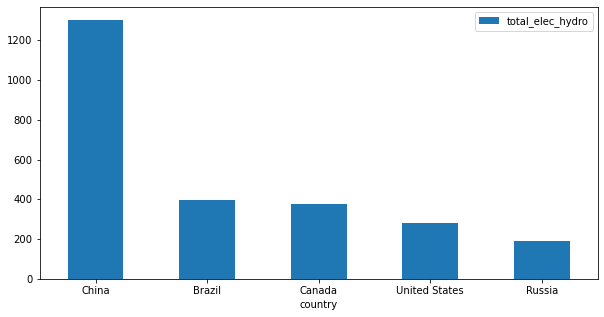

In [296]:
df_525 = df_521_ref
df_525_ref  =  df_525[['country', 'total_elec_hydro']]
# select the top 5 - coal
df_525_hydro_5 = df_525_ref.nlargest(5, 'total_elec_hydro')
ax = df_525_hydro_5.plot.bar(x='country', y='total_elec_hydro', rot=0, figsize=(10,5))

##### 5.2.6 Countries that currently (2019) consume the most electricity per capita out of nuclear

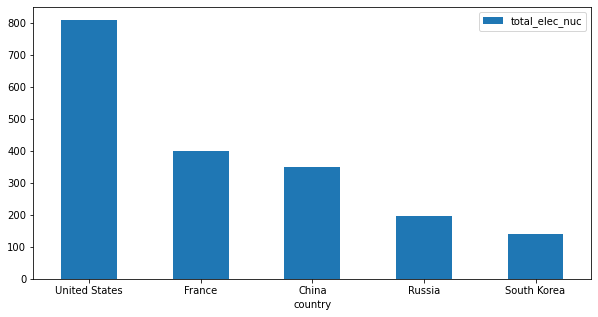

In [297]:
df_526 = df_521_ref
df_526_ref  =  df_526[['country', 'total_elec_nuc']]
# select the top 5 - coal
df_526_nuc_5 = df_526_ref.nlargest(5, 'total_elec_nuc')
ax = df_526_nuc_5.plot.bar(x='country', y='total_elec_nuc', rot=0, figsize=(10,5))

##### 5.2.7 Countries that currently (2019) consume the most electricity per capita out of oil

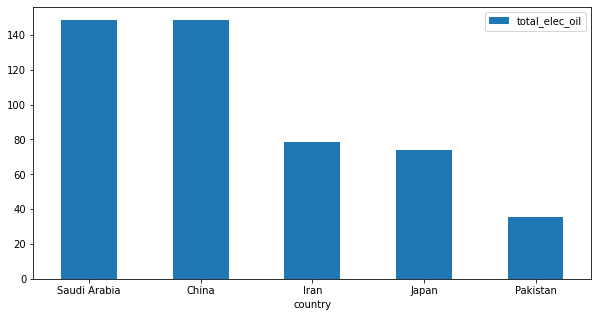

In [298]:
df_527 = df_521_ref
df_527_ref  =  df_527[['country', 'total_elec_oil']]
# select the top 5 - coal
df_527_oil_5 = df_527_ref.nlargest(5, 'total_elec_oil')
ax = df_527_oil_5.plot.bar(x='country', y='total_elec_oil', rot=0, figsize=(10,5))

##### 5.2.8 Countries that currently (2019) consume the most electricity per capita out of solar

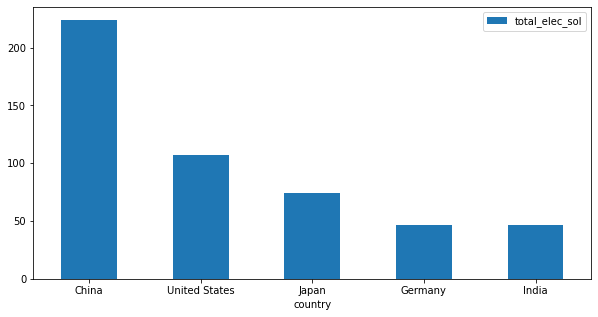

In [299]:
df_528 = df_521_ref
df_528_ref  =  df_528[['country', 'total_elec_sol']]
# select the top 5 - coal
df_528_sol_5 = df_528_ref.nlargest(5, 'total_elec_sol')
ax = df_528_sol_5.plot.bar(x='country', y='total_elec_sol', rot=0, figsize=(10,5))

##### 5.2.9 Countries that currently (2019) consume the most electricity per capita out of wind

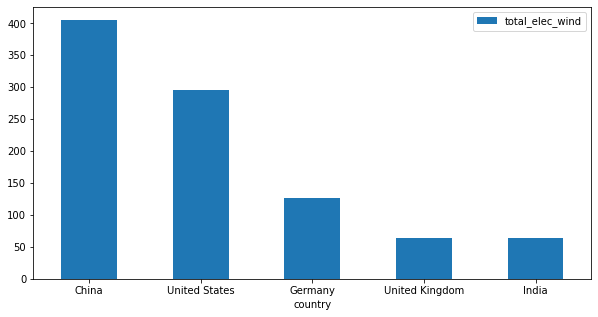

In [300]:
df_529 = df_521_ref
df_529_ref  =  df_529[['country', 'total_elec_wind']]
# select the top 5 - coal
df_529_wind_5 = df_529_ref.nlargest(5, 'total_elec_wind')
ax = df_529_wind_5.plot.bar(x='country', y='total_elec_wind', rot=0, figsize=(10,5))

## Short summary of variables and their info with 2019 year data

### Production of electricity:
- df_511_ref: list of all countries and their total production of electricity
- df_511_electricity_total_5: top 5 countries ordered by their total electricity generation
- df_512_ref : list of all countries and their total biofuel electricity production
- df_512_biofuel_electricity: top 5 countries ordered by their total electricity production out of biofuel
- df_513_ref : list of all countries and their total coal electricity production
- df_513_coal_electricity: top 5 countries ordered by their total electrocity production out of coal
- df_514_ref : list of all countries and their total gas electricity production
- df_514_gas_electricity:  top 5 countries ordered by their total electrocity production out of gas
- df_515_ref: list of all countries and their total hydro electricity production
- df_515_hyrdo_electricity: top 5 countries ordered by their total electrocity production out of hydro
- df_516_ref: list of all countries and their total nuclear electricity production
- df_516_nuclear_electricity: top 5 countries ordered by their total electrocity production out of nuclear
- df_517_ref: list of all countries and their total oil electricity production
- df_517_oil_electricity: top 5 countries ordered by their total electrocity production out of oil
- df_518_ref: list of all countries and their total solar electricity production
- df_518_solar_electricity: top 5 countries ordered by their total electrocity production out of solar
- df_519_ref: list of all countries and their total wind electricity production
- df_519_wind_electricity: r total electrocity production out of wind

### Consumption of electricity:
- df_521_ref: list of all countries and their total consumption of electricity
- df_521_total_elec: top 5 countries ordered by their total electricity consumption
- df_522_ref: all countries and their total biofuel electricity consumption
- df_522_biofuel_5: top 5 countries ordered by their total electricity consumption that was generated with biofuel
- df_523_ref: all countries and their total coal electricity consumption
- df_523_coal_5: top 5 countries ordered by their total electricity consumption that was generated with coal
- df_524_ref: all countries and their total gas electricity consumption
- df_524_gas_5: top 5 countries ordered by their total electricity consumption that was generated with gas
- df_525_ref: all countries and their total hydro electricity consumption
- df_525_hyrdo_5:  top 5 countries ordered by their total electricity consumption that was generated with hydro
- df_526_ref: all countries and their total nuclear electricity consumption
- df_526_nuc_5: top 5 countries ordered by their total electricity consumption that was generated with nuclear
- df_527_ref: all countries and their total oil electricity consumption
- df_527_oil_5: top 5 countries ordered by their total electricity consumption that was generated with oil
- df_528_ref: all countries and their total solar electricity consumption
- df_528_sol_5: top 5 countries ordered by their total electricity consumption that was generated with solar
- df_529_ref: all countries and their total wind electricity consumption
- df_529_wind_5: top 5 countries ordered by their total electricity consumption that was generated with wind

### 5.3 What is the overall development of energy production within the last 30 years?

#### Worldwide

<AxesSubplot:xlabel='year'>

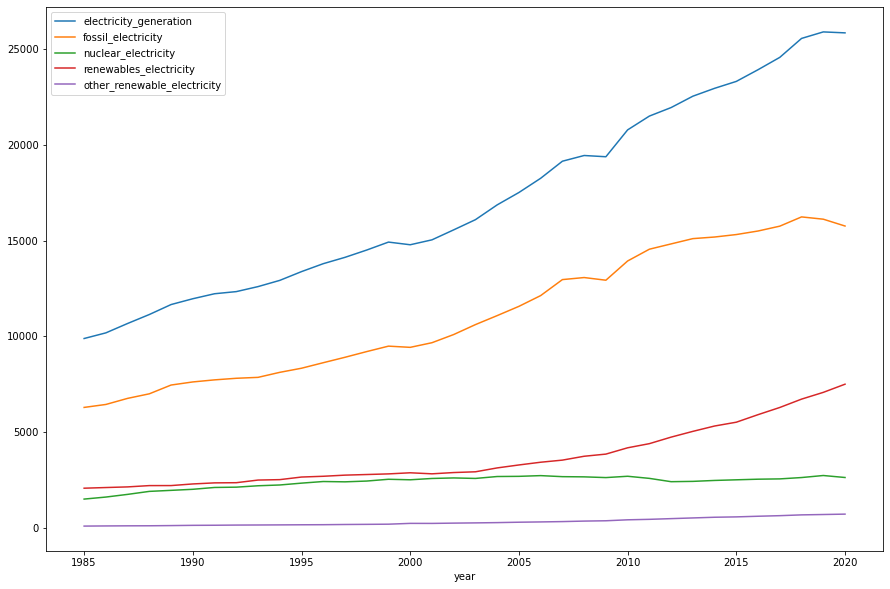

In [301]:
df_53 = wdf
# first only world data
df_53 = df_53[df_53['iso_code'] == 'OWID_WRL']
# remove year 2020 - empty
df_53 = df_53[df_53['year'] != '2020']
df_53.plot.line(x='year', y=[ 'electricity_generation', 'fossil_electricity', 'nuclear_electricity','renewables_electricity', 'other_renewable_electricity'], figsize=(15,10))

#### Europe

<AxesSubplot:xlabel='year'>

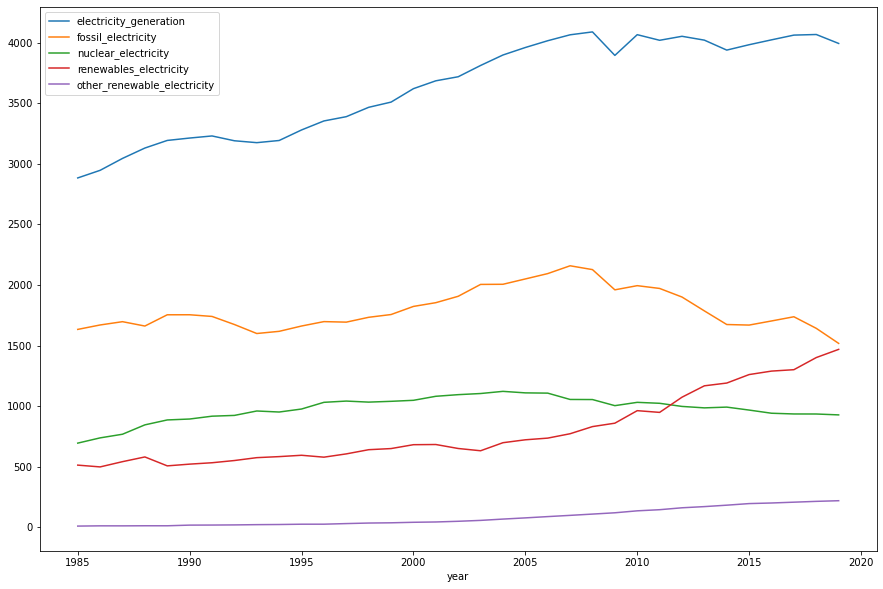

In [303]:
# Europe
df_53 = wdf
df_53 = df_53[df_53['country'] == 'Europe']
# remove year 2020 - empty
df_53 = df_53[df_53['year'] != '2020']
df_53.plot.line(x='year', y=[ 'electricity_generation', 'fossil_electricity', 'nuclear_electricity','renewables_electricity', 'other_renewable_electricity'], figsize=(15,10))

#### Africa

<AxesSubplot:xlabel='year'>

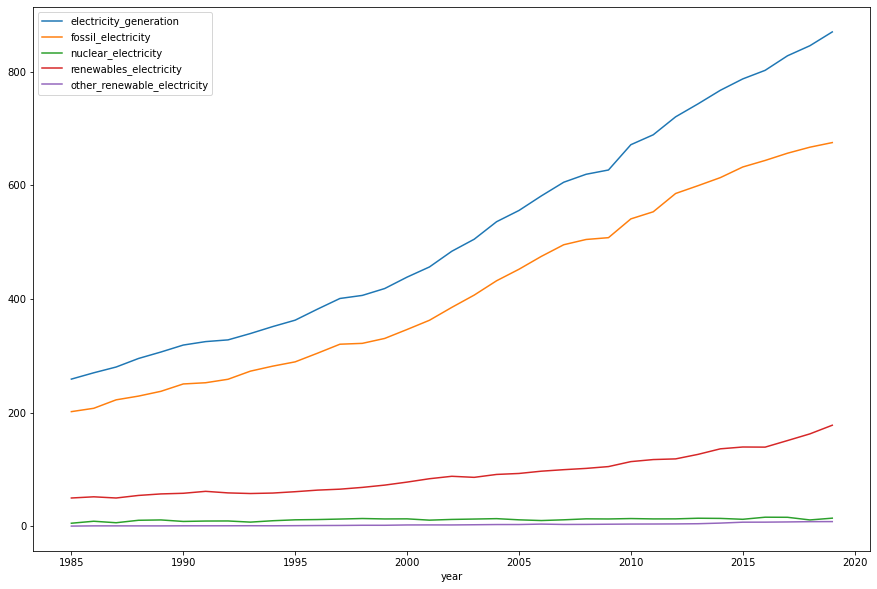

In [304]:
# Africa
df_53 = wdf
df_53 = df_53[df_53['country'] == 'Africa']
# remove year 2020 - empty
df_53 = df_53[df_53['year'] != '2020']
df_53.plot.line(x='year', y=[ 'electricity_generation', 'fossil_electricity', 'nuclear_electricity','renewables_electricity', 'other_renewable_electricity'], figsize=(15,10))

#### Asia Pacific

<AxesSubplot:xlabel='year'>

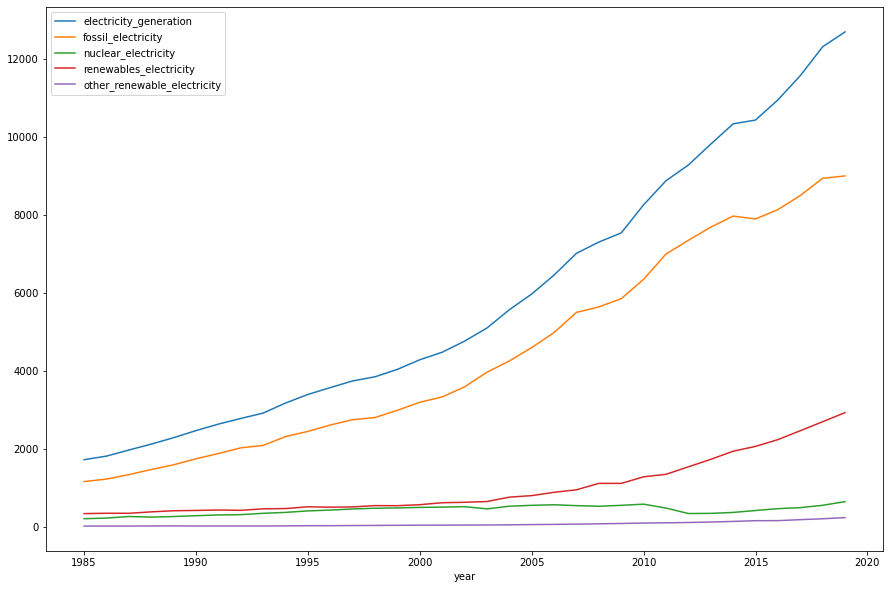

In [309]:
# Asia Pacific
df_53 = wdf
df_53 = df_53[df_53['country'] == 'Asia Pacific']
# remove year 2020 - empty
df_53 = df_53[df_53['year'] != '2020']
df_53.plot.line(x='year', y=[ 'electricity_generation', 'fossil_electricity', 'nuclear_electricity','renewables_electricity', 'other_renewable_electricity'], figsize=(15,10))

#### North America

<AxesSubplot:xlabel='year'>

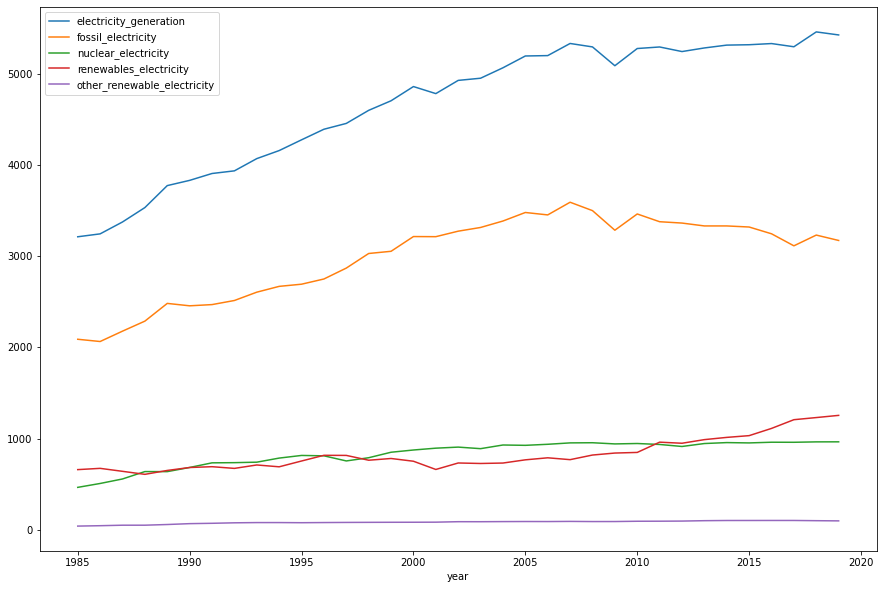

In [310]:
# North America
df_53 = wdf
df_53 = df_53[df_53['country'] == 'North America']
# remove year 2020 - empty
df_53 = df_53[df_53['year'] != '2020']
df_53.plot.line(x='year', y=[ 'electricity_generation', 'fossil_electricity', 'nuclear_electricity','renewables_electricity', 'other_renewable_electricity'], figsize=(15,10))

#### Central and Sourth America

In [ ]:
# Europe
df_53 = wdf
df_53 = df_53[df_53['country'] == 'Ce']
# remove year 2020 - empty
df_53 = df_53[df_53['year'] != '2020']
df_53.plot.line(x='year', y=[ 'electricity_generation', 'fossil_electricity', 'nuclear_electricity','renewables_electricity', 'other_renewable_electricity'], figsize=(15,10))